# import Library

In [23]:
import torch                         
import torch.nn as nn                
import torch.optim as optim           
from torchvision import datasets, transforms 
from torch.utils.data import DataLoader   


### transform for MNIST

In [24]:
transform = transforms.Compose([
    transforms.ToTensor(),            
    transforms.Normalize((0.5,), (0.5,))  
])


### Data Loading

In [25]:
train_dataset = datasets.MNIST(
    root="./data",                   
    train=True,                      
    download=True,                    
    transform=transform             
)


test_dataset = datasets.MNIST(
    root="./data",
    train=False,                     
    download=True,
    transform=transform
)


train_loader = DataLoader(
    train_dataset,
    batch_size=64,                    
    shuffle=True                      
)

test_loader = DataLoader(
    test_dataset,
    batch_size=64,
    shuffle=False                   
)


### Model Definition

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()

        
        self.features = nn.Sequential(

            
            nn.Conv2d(
                in_channels=1,         
                out_channels=32,      
                kernel_size=3,         
                padding=1              
            ),
            nn.ReLU(),                
            nn.MaxPool2d(2),          

            
            nn.Conv2d(
                in_channels=32,
                out_channels=64,
                kernel_size=3,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(2)           
        )

        
        self.classifier = nn.Sequential(
            nn.Flatten(),             
            nn.Linear(64 * 7 * 7, 128),
            nn.ReLU(),
            nn.Linear(128, 10)        
        )


    def forward(self, x):
        x = self.features(x)           
        x = self.classifier(x)         
        return x
    

### If cuda exists, select cuda.

In [27]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device


device(type='cpu')

### Model Defination

In [28]:
model = CNN().to(device)


criterion = nn.CrossEntropyLoss()


optimizer = optim.Adam(
    model.parameters(),               
    lr=0.001                         
)


### Training Loop

In [29]:
epochs = 5                          

for epoch in range(epochs):
    model.train()                   
    total_loss = 0

    for images, labels in train_loader:
        images = images.to(device)    
        labels = labels.to(device)    

        optimizer.zero_grad()         
        outputs = model(images)      
        loss = criterion(outputs, labels) 
        loss.backward()               
        optimizer.step()              

        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {total_loss:.4f}")
    

Epoch [1/5] - Loss: 152.3549
Epoch [2/5] - Loss: 42.6393
Epoch [3/5] - Loss: 29.5031
Epoch [4/5] - Loss: 21.7178
Epoch [5/5] - Loss: 16.7609


### Model Evaluation

In [42]:
model.eval()                        
correct = 0
total = 0

with torch.no_grad():                
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)     
        _, predicted = torch.max(outputs, 1)  

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 98.89%


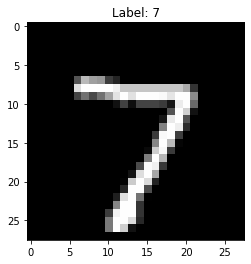

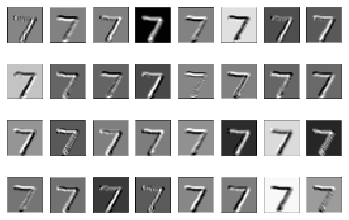

In [43]:
import matplotlib.pyplot as plt

image, label = test_dataset[0]
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"Label: {label}")
plt.show()

model.eval()

with torch.no_grad():
    x = image.unsqueeze(0).to(device)  # (1,1,28,28)
    feature_maps = model.features[0](x)  # فقط Conv اول
    feature_maps = feature_maps.squeeze().cpu().detach().numpy()
    for i in range(feature_maps.shape[0]):
        plt.subplot(4, 8, i + 1)
        plt.imshow(feature_maps[i], cmap="gray")
        plt.axis("off")
    plt.show()
